<a href="https://colab.research.google.com/github/Trantracy/Synthesised-transaction-analysis-at-ANZ/blob/master/ANZ_Predictive_analytics_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

df_data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ANZ/ANZ synthesised transaction dataset.xlsx")

# *Importing necessary modules*

In [66]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_data.sample(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5148,posted,NaN,NaN,ACC-3485804958,AUD,138.52 -35.01,INTER BANK,NaN,NaN,Jessica,20077.00,2018-09-10,F,34,NaN,NaN,2018-09-10T03:00:00.000+0000,169.00,529d95b87a6c4600ac73e021e8606d2a,Australia,CUS-1196156254,NaN,debit
1256,posted,NaN,NaN,ACC-3827517394,AUD,151.12 -33.89,PAYMENT,NaN,NaN,Craig,29028.39,2018-08-10,M,28,NaN,NaN,2018-08-10T16:00:00.000+0000,43.00,3e890a0f657f4c29a6842748c6f9a37f,Australia,CUS-2663907001,NaN,debit
4418,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,d2b99dd2-ee51-45a9-bdbe-f966d3336ff6,NaN,Kristin,2856.17,2018-09-04,F,43,Middle Park,VIC,2018-09-04T17:14:12.000+0000,21.19,4a5cd17aac014128b6d86261ba62fd98,Australia,CUS-4123612273,144.96 -37.85,debit
1393,posted,NaN,NaN,ACC-3771436525,AUD,145.04 -37.92,PAYMENT,NaN,NaN,Derek,292.41,2018-08-11,M,20,NaN,NaN,2018-08-11T17:00:00.000+0000,1239.00,ded0fd964f0748d98b08ab852b88c5b9,Australia,CUS-3325710106,NaN,debit
9955,posted,NaN,NaN,ACC-354106658,AUD,151.04 -33.80,PAYMENT,NaN,NaN,Christine,23977.54,2018-10-16,F,39,NaN,NaN,2018-10-16T06:00:00.000+0000,21.00,c937d4089bac4440b572f353c0143063,Australia,CUS-2376382098,NaN,debit


In [18]:
df_data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [60]:
# selecting important featuers
df_feature = df_data[["customer_id","age","txn_description","balance","amount"]]

In [100]:
print(df_feature['txn_description'].value_counts())

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


In [61]:
df_feature

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25
...,...,...,...,...,...
12038,CUS-55310383,30,POS,14054.14,9.79
12039,CUS-2688605418,20,SALES-POS,9137.79,63.87
12040,CUS-2663907001,28,POS,45394.57,43.96
12041,CUS-1388323263,69,SALES-POS,11350.67,30.77


In [62]:
df = df_feature.groupby("customer_id").mean().reset_index()
df

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796
...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276
96,CUS-809013380,21,3756.902903,151.694274
97,CUS-860700529,30,3462.276009,77.681888
98,CUS-880898248,26,8528.830385,146.954487


In [54]:
 # The average salary of each customer
df_salary = df_feature.loc[df_feature['txn_description'] == 'PAY/SALARY'].groupby('customer_id').agg({'amount': [('Average of salary','mean')]})
df_salary.columns = df_salary.columns.droplevel()
df_salary = df_salary.reset_index()

In [55]:
df_salary

,customer_id,Average of salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73
...,...,...
95,CUS-72755508,725.32
96,CUS-809013380,1037.07
97,CUS-860700529,1808.62
98,CUS-880898248,1433.98


In [64]:
df = pd.merge(df, df_salary, on = 'customer_id')

In [65]:
df

,customer_id,age,balance,amount,Average of salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73
...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276,725.32
96,CUS-809013380,21,3756.902903,151.694274,1037.07
97,CUS-860700529,30,3462.276009,77.681888,1808.62
98,CUS-880898248,26,8528.830385,146.954487,1433.98


## analyze relation between existing data

### Salary v/s Age

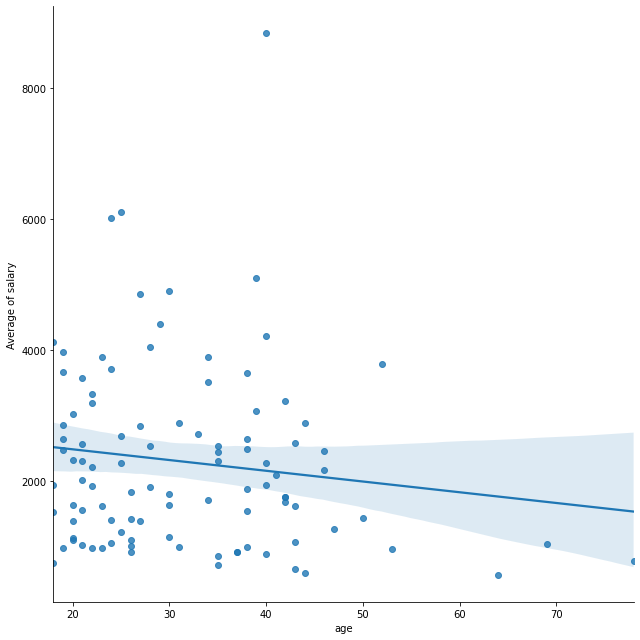

In [81]:
# Regression Plot
sns.lmplot("age", "Average of salary", data=df, height= 9)
# age_sal.fig.set_figwidth(12)
# age_sal.fig.set_figheight(12)

### Salary v/s Account Balance:

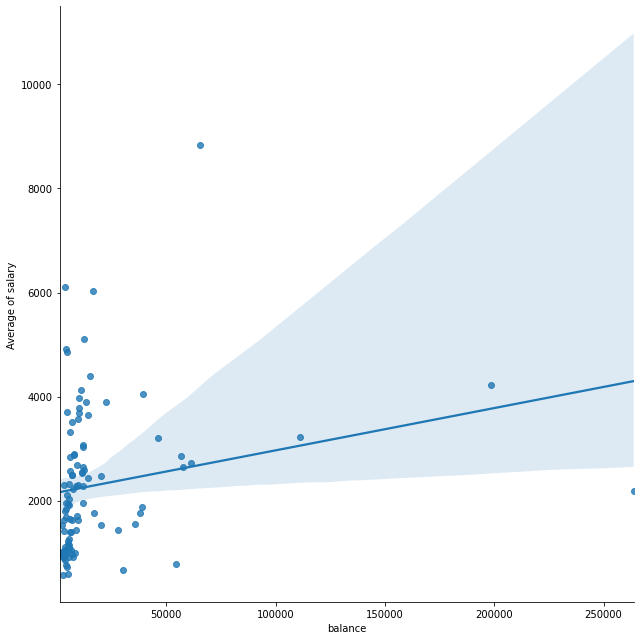

In [83]:
sns.lmplot("balance", "Average of salary", data=df,height = 9)

### Salary v/s Transaction Amount

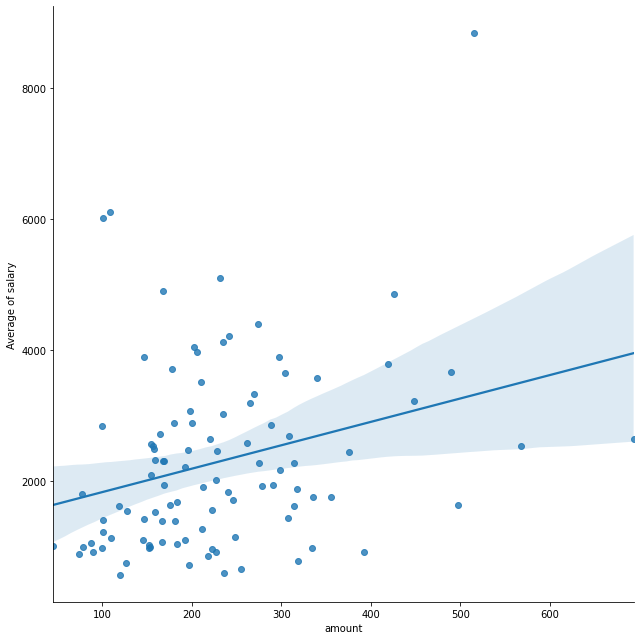

In [84]:
sns.lmplot('amount','Average of salary',height=9, data= df)

## Feature engineering:

In [112]:
# POS indicates spending behavior of customer
pos=df_data[df_data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").agg({'amount': [('POS','mean')]})
pos.columns = pos.columns.droplevel()
pos = pos.reset_index()

In [113]:
pos

,customer_id,POS
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432
...,...,...
95,CUS-72755508,25.022143
96,CUS-809013380,22.255098
97,CUS-860700529,28.164845
98,CUS-880898248,20.101429


In [114]:
# payment indicates spending behavior of customer
payment=df_data[df_data["txn_description"]==("PAYMENT")].groupby("customer_id").agg({'amount': [('payment','mean')]})
payment.columns = payment.columns.droplevel()
payment = payment.reset_index()

In [115]:
payment

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000
...,...,...
95,CUS-72755508,1180.000000
96,CUS-809013380,70.136364
97,CUS-860700529,41.933333
98,CUS-880898248,77.500000


In [ ]:
# merge all feature to dataframe:
dfs = [df, pos, payment]
dfs = [x.set_index('customer_id') for x in dfs]

df = pd.concat(dfs, axis=1, keys=range(1, len(dfs) + 1))
df.columns = df.columns.map('{0[1]}{0[0]}'.format)
df = df.reset_index()

In [122]:
df = df.drop(columns='amount1')
df

,customer_id,age1,balance1,Average of salary1,POS2,payment3
0,CUS-1005756958,53,2275.852055,970.47,28.769615,144.000000
1,CUS-1117979751,21,9829.929000,3578.65,23.321923,98.925000
2,CUS-1140341822,28,5699.212250,1916.51,34.781282,142.000000
3,CUS-1147642491,34,9032.841186,1711.39,54.271316,96.185185
4,CUS-1196156254,34,22272.433755,3903.73,31.157432,43.100000
...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,725.32,25.022143,1180.000000
96,CUS-809013380,21,3756.902903,1037.07,22.255098,70.136364
97,CUS-860700529,30,3462.276009,1808.62,28.164845,41.933333
98,CUS-880898248,26,8528.830385,1433.98,20.101429,77.500000


# Predictive Analytics

## Supervised models:

#### Linear Regression Model:

In [144]:
X = df[['age1','balance1','payment3','POS2']].values
y = df['Average of salary1'].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [146]:
lr = LinearRegression()
result = lr.fit(X_train, y_train)

In [147]:
result.score(X, y)

0.11930439490077782

In [148]:
y_pred=result.predict(X_test)

In [149]:
y_pred

array([1786.69647209, 2783.72451877, 2430.16351047, 2304.23562834,
       2147.46192293, 2378.07469492, 2193.95226528, 1789.92245217,
       1706.87798721, 1688.14678402, 2072.65990742, 2156.86899816,
       2690.46864673, 2903.14798774, 2516.69448925, 2428.93981617,
       2243.430991  , 2943.44318374, 2353.76614553, 2469.64894938])

In [150]:
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715894


In [151]:
# "squared=False" return the RMSE.
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

1431.5583144017253

The RMSE of the model over the whole dataset is over 1000, which indicates the inaccuracy of the model. 
The model's r2_score also shows that it only explains about 7.6% of variation in customers' salary. It is thus risky to use this linear model to predict customers' income bracket. More data is required to develop a more reliable model.

## Decision tree: 

In [152]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [153]:
dt.predict(X_test)

array([1272.47, 2854.74, 3517.61, 2218.73, 3071.14, 3649.51, 2840.15,
        916.75, 2280.36, 1043.12,  576.  , 2500.  , 3026.95, 2854.74,
       3676.94, 2718.51, 2320.3 , 3676.94, 2218.73, 3517.61])

In [154]:
dt.score(X_test, y_test)

0.21693718507047233

In [157]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([1272.47, 2854.74, 3517.61, 2218.73, 3071.14, 3649.51, 2840.15,
        916.75, 2280.36, 1043.12,  576.  , 2500.  , 3026.95, 2854.74,
       3676.94, 2718.51, 2320.3 , 3676.94, 2218.73, 3517.61])

In [158]:
print('Coefficient of determination: ', r2_score(y_test, y_pred_dt))

Coefficient of determination:  0.21693718507047233


In [159]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_pred_dt, squared=False)
RMSE

1318.3388051730103

With decision tree algorithm, the result is better. However, the result is still low. Main reason is lack of data.